In [215]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import math
import numpy as np

class Data:
    """ A util class to store the training and test datasets. """
    verbose = False
    
    def __init__(self, tr_explanatory: pd.DataFrame, tr_explained: pd.DataFrame, 
                test_explanatory: pd.DataFrame, test_explained: pd.DataFrame):
        
        self.tr_explanatory = tr_explanatory
        self.tr_explained = tr_explained
        self.test_explanatory = test_explanatory
        self.test_explained = test_explained
    
    def consistency_check(self):
        if self.verbose:
            print("Shape EXPLANATORY (Training set): {}".format(self.tr_explanatory.shape))
            print("Shape EXPLAINED (Training set): {}".format(self.tr_explained.shape))
            print("Shape EXPLANATORY (Test set): {}".format(self.test_explanatory.shape))
            print("Shape EXPLAINED (Test set): {}".format(self.test_explained.shape))
        
        if self.tr_explanatory.shape[0] == self.tr_explained.shape[0] and \
            self.test_explanatory.shape[0] == self.test_explained.shape[0] and \
            self.tr_explanatory.shape[1] == self.test_explanatory.shape[1] :
            print("Consistent dimensions.")
            return True
        else:
            print("ERROR: Inconsistent dimensions!")
            print(self.tr_explanatory.shape[0] == self.tr_explained.shape[0])
            print(self.test_explanatory.shape[0] == self.test_explained.shape[0])
            print(self.tr_explanatory.shape[1] == self.test_explanatory.shape[1])
            return False 

In [216]:
#Load CSV file
data = pd.read_csv('../shuffle_email_spam_classification.csv')

In [217]:
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


(  Email No.  the  to  ect  and  for  of    a  you  hou  ...  connevey  jay  \
 0   Email 1    0   0    1    0    0   0    2    0    0  ...         0    0   
 1   Email 2    8  13   24    6    6   2  102    1   27  ...         0    0   
 2   Email 3    0   0    1    0    0   0    8    0    0  ...         0    0   
 3   Email 4    0   5   22    0    5   1   51    2   10  ...         0    0   
 4   Email 5    7   6   17    1    5   2   57    0    9  ...         0    0   
 
    valued  lay  infrastructure  military  allowing  ff  dry  Prediction  
 0       0    0               0         0         0   0    0           0  
 1       0    0               0         0         0   1    0           0  
 2       0    0               0         0         0   0    0           0  
 3       0    0               0         0         0   0    0           0  
 4       0    0               0         0         0   1    0           0  
 
 [5 rows x 3002 columns],
 None)

In [218]:
#Preprocessing
# Step 1: Remove the "Email No." column and change 0's to -1 in the "Prediction" column
data["Prediction"] = data["Prediction"].apply(lambda x: -1 if x == 0 else 1)
data_cleaned = data.drop(columns=["Email No."])
data_cleaned = data_cleaned.sample(frac=1).reset_index(drop=True)
n = data_cleaned.shape[0]
thr = math.floor(0.75 * n)

X_train = data_cleaned.iloc[:thr, :-1]
Y_train = data_cleaned.iloc[:thr, -1]
X_test = data_cleaned.iloc[thr:, :-1]
Y_test = data_cleaned.iloc[thr:, -1]

#Data object
yy = Data(X_train, Y_train, X_test, Y_test)

yy.consistency_check()

Consistent dimensions.


True

In [219]:
#LOGISTIC REGRESSION
from sklearn.linear_model import LogisticRegression

# Initialize Logistic Regression with increased max_iter and solver
# logreg = LogisticRegression(max_iter=500, solver='lbfgs')
logreg = LogisticRegression(max_iter=5000)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(yy.tr_explanatory)
# X_test_scaled = scaler.transform(yy.test_explanatory)

# Fit the model
logreg.fit(yy.tr_explanatory, yy.tr_explained)

#Predict the fitted data
# predictions_LR = logreg.predict(X_test_scaled)
predictions_LR = logreg.predict(yy.test_explanatory)

# print("All predictions: {0} \n\n\n".format(predictions_LR))
# pred_vs_actual_LR_df = pd.DataFrame({
#     "LogPredict": predictions_LR,
#     "Actual": yy.test_explained
# })

# print(pred_vs_actual_LR_df)

print("All predictions: {0} \n\n\n".format(predictions_LR))
pred_vs_actual_LR_df = yy.test_explanatory.copy()
pred_vs_actual_LR_df["LogPredict"] = predictions_LR
pred_vs_actual_LR_df["ClassActual"] = yy.test_explained
print(pred_vs_actual_LR_df)

All predictions: [-1  1 -1 ... -1 -1  1] 



      the  to  ect  and  for  of    a  you  hou  in  ...  jay  valued  lay  \
3879    0   1    2    0    1   0   13    0    0   0  ...    0       0    0   
3880    1   0    1    0    0   1    9    1    0   1  ...    0       0    0   
3881    8  19   17    4    2   4  113   10    5  14  ...    0       0    0   
3882    4   2    1    1    0   0   29    1    0   0  ...    0       0    0   
3883    0   0    1    0    1   0    3    0    0   0  ...    0       0    0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...  ...     ...  ...   
5167   39  38    3   10   17  11  125   22    3  44  ...    0       0    0   
5168    2   1    1    1    0   1   17    0    0   4  ...    0       0    0   
5169    5   9    1    3    1   3   68    4    2  18  ...    0       0    0   
5170    2   4    8    2    1   0   28    0    3   4  ...    0       0    0   
5171    0   2    1    0    0   0    4    1    0   2  ...    0       0    0   

      infrastructu

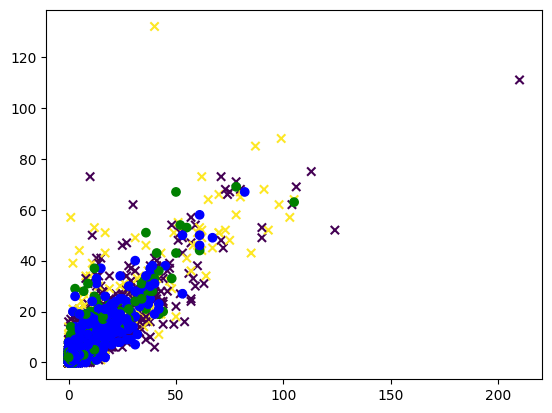

In [220]:
import matplotlib.pyplot as plt
# Visualize both the Training and the Test set
plt.scatter(yy.tr_explanatory.iloc[:, 0], yy.tr_explanatory.iloc[:, 1], c = yy.tr_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_LR_df['CLass-Color'] = pred_vs_actual_LR_df['LogPredict'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_LR_df.iloc[:, 0], 
    pred_vs_actual_LR_df.iloc[:, 1], 
    c=pred_vs_actual_LR_df["CLass-Color"], 
    marker="o")

plt.show()

In [221]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_LR = confusion_matrix(yy.test_explained, predictions_LR)
print("Confusion matrix: \n{}".format(confusion_mtx_LR))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_LR, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_LR, output_dict=False))

Confusion matrix: 
[[905  17]
 [ 14 357]]

#####   Accuracy: 97.60247486465585 %   ##### 



              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       922
           1       0.95      0.96      0.96       371

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293



In [222]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Initialize
naive_bayes = GaussianNB()

# ################################################
# Fit the model 
naive_bayes.fit(yy.tr_explanatory, yy.tr_explained)

# ################################################
# Predict new data instances
predictions_NB = naive_bayes.predict(yy.test_explanatory)


print("All predictions: {0} \n\n\n".format(predictions_NB))
pred_vs_actual_NB_df = yy.test_explanatory.copy()
pred_vs_actual_NB_df["NBPredicted"] = predictions_NB
pred_vs_actual_NB_df["ClassActual"] = yy.test_explained
print(pred_vs_actual_NB_df)

All predictions: [-1  1 -1 ... -1 -1  1] 



      the  to  ect  and  for  of    a  you  hou  in  ...  jay  valued  lay  \
3879    0   1    2    0    1   0   13    0    0   0  ...    0       0    0   
3880    1   0    1    0    0   1    9    1    0   1  ...    0       0    0   
3881    8  19   17    4    2   4  113   10    5  14  ...    0       0    0   
3882    4   2    1    1    0   0   29    1    0   0  ...    0       0    0   
3883    0   0    1    0    1   0    3    0    0   0  ...    0       0    0   
...   ...  ..  ...  ...  ...  ..  ...  ...  ...  ..  ...  ...     ...  ...   
5167   39  38    3   10   17  11  125   22    3  44  ...    0       0    0   
5168    2   1    1    1    0   1   17    0    0   4  ...    0       0    0   
5169    5   9    1    3    1   3   68    4    2  18  ...    0       0    0   
5170    2   4    8    2    1   0   28    0    3   4  ...    0       0    0   
5171    0   2    1    0    0   0    4    1    0   2  ...    0       0    0   

      infrastructu

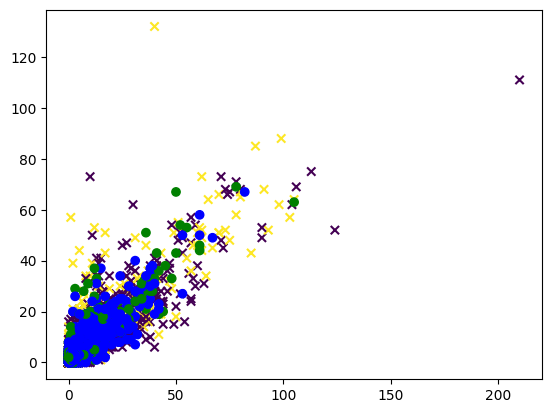

In [223]:
# Visualize both the Training and the Test set
plt.scatter(yy.tr_explanatory.iloc[:, 0], 
            yy.tr_explanatory.iloc[:, 1], 
            c = yy.tr_explained, marker="x")

# Create a new column with custom colors: Green for class "1"; Blue for class "-1" 
pred_vs_actual_NB_df['CLass-Color'] = pred_vs_actual_NB_df['NBPredicted'].apply(lambda x: 'Green' if x == 1 else 'Blue')

plt.scatter(
    pred_vs_actual_NB_df.iloc[:, 0], 
    pred_vs_actual_NB_df.iloc[:, 1], 
    c=pred_vs_actual_NB_df["CLass-Color"], 
    marker="o")

plt.show()

In [224]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mtx_NB = confusion_matrix(yy.test_explained, predictions_NB)
print("Confusion matrix: \n{}".format(confusion_mtx_NB))

# Get only the Accuracy
ACC = classification_report(yy.test_explained, predictions_NB, output_dict=True)['accuracy']
print("\n#####   Accuracy: {} %   ##### \n\n\n".format(ACC*100))

# Get all stats
print(classification_report(yy.test_explained, predictions_NB, output_dict=False))

Confusion matrix: 
[[884  38]
 [ 19 352]]

#####   Accuracy: 95.59164733178655 %   ##### 



              precision    recall  f1-score   support

          -1       0.98      0.96      0.97       922
           1       0.90      0.95      0.93       371

    accuracy                           0.96      1293
   macro avg       0.94      0.95      0.95      1293
weighted avg       0.96      0.96      0.96      1293



In [225]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

def run_classifiers(data, classifiers):
    
    results = pd.DataFrame(columns = ["Classifier", "Accuracy"])
    
    for cla in classifiers: 
        
        tr_explanatory = data.tr_explanatory
        test_explanatory = data.test_explanatory

        # ################################################
        cla.fit(data.tr_explanatory, data.tr_explained) # Fit the model 
        predictions = cla.predict(test_explanatory)  # Predict new data instances
        # ################################################
        confusion_mtx = confusion_matrix(data.test_explained, predictions)
        
        # Get the Accuracy
        # ACC = classification_report(data.test_explained, predictions, output_dict=True)['accuracy']
        ACC = np.sum(data.test_explained == predictions) / len(predictions)
        ACC *= 100  #in %
        
        
        cla_name =  str(type(cla)).split(".")[-1].replace(">", "").replace("'", "")
        results = pd.concat([results, pd.DataFrame([{"Classifier": cla_name, "Accuracy": ACC}])], ignore_index=True)
    
    results = results.sort_values(by=['Accuracy'], ascending=False)
    
    return results

In [226]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

cl_list = [KNeighborsClassifier(n_neighbors=1), 
           LogisticRegression(max_iter=5000), 
           GaussianNB(), 
           tree.DecisionTreeClassifier(), 
           RandomForestClassifier(n_estimators=50)]

results = run_classifiers(data = yy, classifiers = cl_list)

print(results)

C:\Users\user\AppData\Local\Temp\ipykernel_2276\2889533749.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame([{"Classifier": cla_name, "Accuracy": ACC}])], ignore_index=True)


               Classifier   Accuracy
1      LogisticRegression  97.602475
4  RandomForestClassifier  96.442382
2              GaussianNB  95.591647
3  DecisionTreeClassifier  93.812838
0    KNeighborsClassifier  85.382831


In [227]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt



def evaluate_classifier(classifier, data):
    """ Run a classification algorithm 
        and evaluate its performance.
        
        "X" denotes the EXPLANATORY variables
        "Y" denotes the EXPLAINED variable
    """
    
    # Fit the model 
    classifier.fit(data.tr_explanatory, data.tr_explained)

    # Predict new data instances
    predicted = classifier.predict(data.test_explanatory)
    
    # Evaluate performance: use 'predict_proba', which works like 'predict', but returns 
    # more data, in particular the estimated probabilities for each class
    probabilities = classifier.predict_proba(data.test_explanatory)
    probabilities = probabilities[:, 1] 
    
    fpr, tpr, thresholds = roc_curve(data.test_explained, probabilities)
    auc = roc_auc_score(data.test_explained, probabilities)
    
    
    # Classification report / Accuracy
    conf_matrix = confusion_matrix(data.test_explained, predicted) 
    
    # Get the Accuracy
    ACC = classification_report(Y_test, predicted, output_dict=True)['accuracy']
    cl_report = classification_report(data.test_explained, predicted, output_dict=False)
    
    print("\n#####   Accuracy: {:.5f} %   ##### ".format(ACC*100))
    print("#####   AUC = {:.5f}          ##### \n\n".format(auc))
    print("Confusion matrix: \n{}".format(conf_matrix))

    # Print all stats
    print(cl_report)
    
    
    # ROC plot
    fig = plt.figure()
    fg, ax1 = plt.subplots(1, 1, figsize=(10, 10)) 
    ax1.set_xlim([-0.05, 1.05])
    ax1.set_ylim([-0.05, 1.05])
    ax1.plot([0, 1], [0, 1], linestyle = "-", color = 'k')
    ax1.title.set_text("ROC " + str(type(classifier)))
    ax1.plot(fpr, tpr, marker = "", alpha = 0.8)
    plt.show()


#####   Accuracy: 85.61485 %   ##### 
#####   AUC = 0.89827          ##### 


Confusion matrix: 
[[803 119]
 [ 67 304]]
              precision    recall  f1-score   support

          -1       0.92      0.87      0.90       922
           1       0.72      0.82      0.77       371

    accuracy                           0.86      1293
   macro avg       0.82      0.85      0.83      1293
weighted avg       0.86      0.86      0.86      1293



<Figure size 640x480 with 0 Axes>

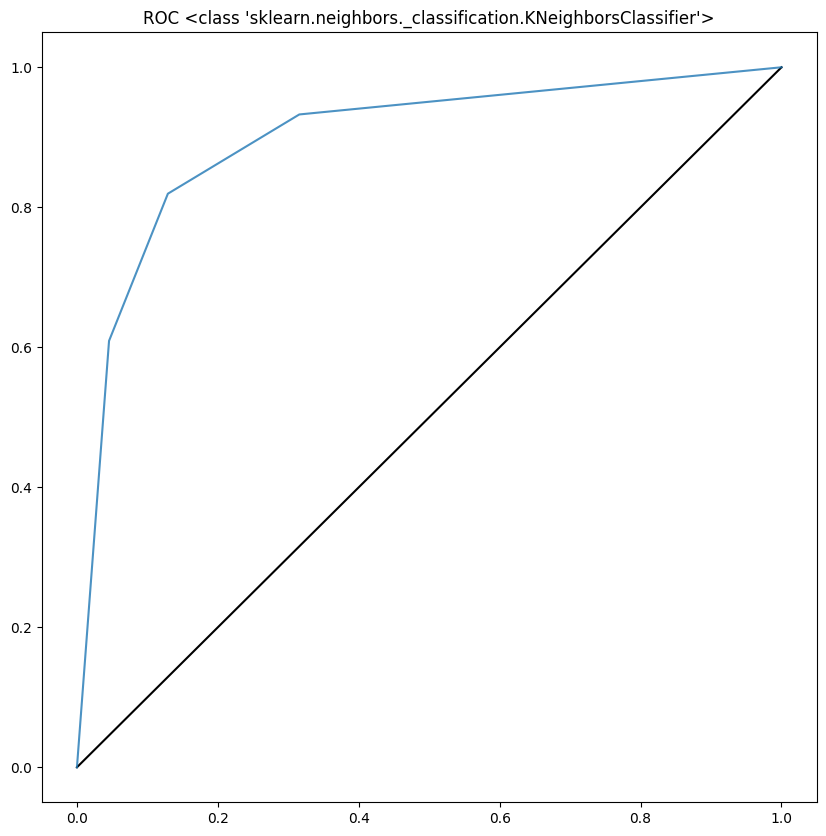

In [228]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

kNNr = KNeighborsClassifier(n_neighbors=3)

evaluate_classifier(kNNr, yy)


#####   Accuracy: 97.60247 %   ##### 
#####   AUC = 0.99443          ##### 


Confusion matrix: 
[[905  17]
 [ 14 357]]
              precision    recall  f1-score   support

          -1       0.98      0.98      0.98       922
           1       0.95      0.96      0.96       371

    accuracy                           0.98      1293
   macro avg       0.97      0.97      0.97      1293
weighted avg       0.98      0.98      0.98      1293



<Figure size 640x480 with 0 Axes>

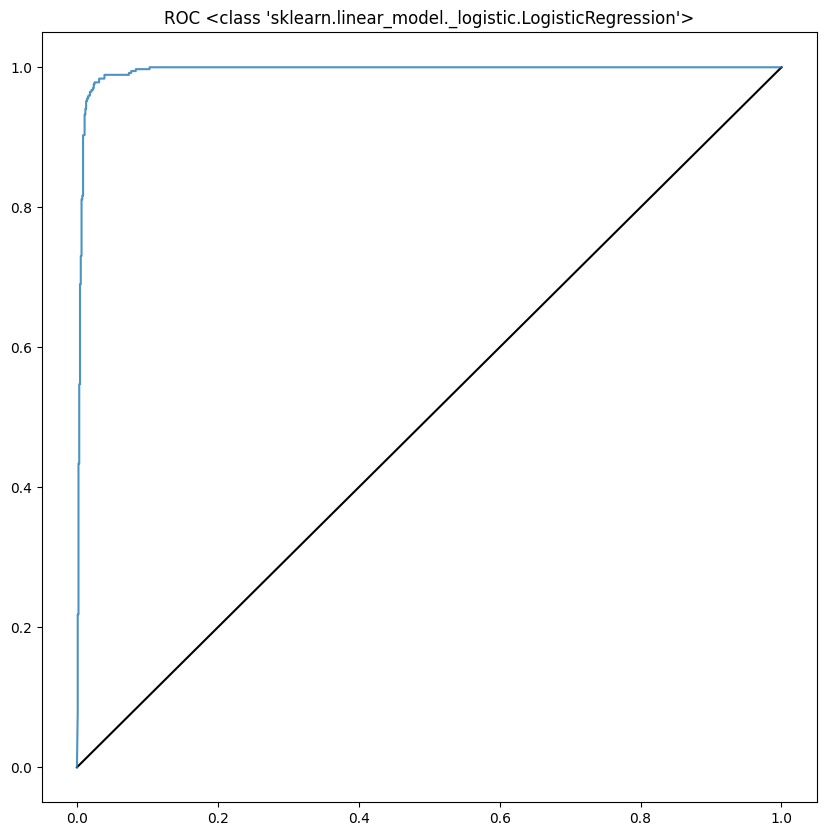

In [229]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=5000)
evaluate_classifier(logreg, yy)

In [ ]:
q